

## **Exploring Global Peace and Security: Sentiment Trends and Conflict Reporting in International and Portuguese Media (2019-2023)**

#### by

### Demilade Olabode Aliu



## PREAMBLE


### Recap

So far, we have explored **global peace and security** through sentiment trends and conflict reporting in international media, particularly focusing on the **United Nations - Peace and Security** section. However, when projecting this analysis onto the Portuguese media website, we encountered several limitations:

### Key Limitations

1. **Data Availability**:  
   Not all data was accessible on **arquivo.pt**, particularly from 2021 onward. This limited access affected the completeness of the dataset, which in turn may have skewed the analysis. As a result, there could be **gaps in data**, potentially introducing **bias** in the results, especially for the more recent years.

2. **Bias in Comparison**:  
   The comparison between the **UN Peace and Security** section and the Portuguese media may have been biased due to the **wide scope** of content across different sections of the media outlet. Keywords relevant to peace and security may appear in areas such as **sports**, **entertainment**, or **economics**, where they may not carry the same contextual weight as in the dedicated UN peace and security reports. This disparity in context could distort the analysis and affect the accuracy of correlations between the media content and UN peace and security topics.


## **Objectives for Second-Stage Analysis**
1. **Addressing Limitations:**
   - Identify and implement a systematic approach to overcome limitations observed during the previous analysis.  
   - Ensure consistency, improve data quality, and refine methodologies where needed.

2. **Top 10 Words Analysis:**
   - Extract and analyze the top 10 words most relevant to the insights derived from the first-stage analysis.  
   - Focus on the frequency, context, and significance of these words.

3. **Correlation Analysis:**
   - Examine the correlation between the top 10 words and their occurrences in the Portuguese media.
   - Investigate relationships and trends to draw meaningful insights.

4. **Conflict Occurrence by Region and Year:**
   - Analyze the occurrence of major conflict-related issues identified during the first stage, focusing on specific regions and years.  
   - Explore patterns and variations to deepen understanding of conflict trends and the projection of these conflicts on the portuguese media


## **How We Addressed the Limitations**  

Our main challenges were **data availability** and **bias in comparison**. Here’s how we overcame them:

---

### **Steps Taken:**

1. **Enhanced Data Access with CDX API**:  
   - Switched to the **CDX API** to extract all URLs of articles from **publico.pt** (2019–2023).  
   - This resolved limitations in data availability by providing a more comprehensive dataset.

2. **Contextual Data Processing**:  
   - **Extract Key Content**: Focused on **sections** and **headlines** from the HTML for deeper contextual understanding.  
   - **Data Cleaning**: Removed noise (e.g., HTML tags, formatting issues) and normalized text for accurate analysis.  
   - **Filter Irrelevant Sections**: Excluded unrelated topics like sports, entertainment, and health to avoid bias.

3. **Streamlined Workflow**:  
   - Ensured the refined dataset was aligned with the study's objectives, enabling accurate and focused analysis.  


## DATA ACQUISITION

### Data Acquisition

For the data acquisition process, we utilized the **CDX API** to collect URLs and timestamps for articles published on **publico.pt** between 2019 and 2023.

#### **Key Functionality**

1. **Fetching Historical URLs**:  
   - Utilized the **CDX API** to retrieve historical URLs from **publico.pt** for the period spanning **2019 to 2023**.  
   - Data was collected month by month to ensure comprehensive coverage of the target timeframe.  

2. **Batch Processing**:  
   - Implemented a batch processing approach to handle large volumes of data efficiently.  
   - Periodically saved collected data to avoid losses during long-running processes or interruptions.  

3. **Fetching Archived Webpages**:  
   - Archived webpages were fetched from **arquivo.pt**, allowing us to access content no longer available on the live site.  
   - Extracted key metadata such as **headlines** and **sections** for each article URL.  

4. **Efficient Data Extraction**:  
   - Employed multi-threading to process URLs in parallel, significantly reducing the time required for data collection and processing.  

By combining these approaches, we ensured the efficient and accurate collection of a rich dataset for further analysis.

### Data Acquisition

**The code below collects URLs and timestamps from the CDX API for articles published on publico.pt between 2019 and 2023**

**Key Functionality**

- Fetches historical URLs from publico.pt using the CDX API.
- Collects and processes URLs for each month from 2019 to 2023.
- Uses batch processing to efficiently collect data and save it periodically.

In [ ]:
'''
import requests
import pandas as pd
import json
import time

def collect_urls_from_cdx_api(base_url, params):
    """
    Collect URLs and timestamps using the CDX API.

    Args:
        base_url (str): Base URL for the CDX API (e.g., "https://arquivo.pt/wayback/cdx").
        params (dict): Query parameters for the CDX API.

    Returns:
        pd.DataFrame: DataFrame containing URLs and timestamps.
    """
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()

        # Handle line-by-line JSON parsing
        data = []
        for line in response.text.splitlines():
            try:
                record = json.loads(line)
                data.append(record)
            except json.JSONDecodeError:
                print(f"Skipped a line due to JSONDecodeError: {line}")

        # Create a DataFrame from the collected data
        if data:
            df = pd.DataFrame(data, columns=["url", "timestamp"])
            return df
        else:
            print("No valid data found.")
            return pd.DataFrame(columns=["url", "timestamp"])

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from CDX API: {e}")
        return pd.DataFrame()

# CDX API configuration
base_url = "https://arquivo.pt/wayback/cdx"

# List of years to loop through (2019-2023)
years = [2019, 2020, 2021, 2022, 2023]
months = [f"{month:02d}" for month in range(1, 13)]  # Generate months 01 to 12

# Function to process years and months in batches
def collect_data_in_batches(years, months, batch_size=2):
    all_data = []

    # Split years into batches
    year_batches = [years[i:i + batch_size] for i in range(0, len(years), batch_size)]

    for batch in year_batches:
        print(f"Processing batch: {batch}")

        # Loop through each year in the current batch
        for year in batch:
            for month in months:
                params = {
                    "url": f"publico.pt/{year}/{month}/",  # URL pattern for each month of each year
                    "matchType": "prefix",
                    "filter": "url:noticia",
                    "output": "json",
                    "fields": "url,timestamp"
                }

                # Fetch data from the CDX API for the current month and year
                df_urls = collect_urls_from_cdx_api(base_url, params)
                if not df_urls.empty:
                    all_data.append(df_urls)

                # Pause for a moment to avoid overloading the server or hitting rate limits
                time.sleep(1)  # Sleep for 1 second (you can adjust the time as needed)

        # Optional: Save data after each batch
        if all_data:
            df_all_urls = pd.concat(all_data, ignore_index=True)
            df_all_urls.to_csv(f"collected_urls_batch_{batch[0]}_{batch[-1]}.csv", index=False)
            print(f"Data for batch {batch} saved to CSV.")

    return all_data

# Run the function to collect data in batches
all_collected_data = collect_data_in_batches(years, months, batch_size=2)

# Combine all collected data into one DataFrame
if all_collected_data:
    df_all_urls = pd.concat(all_collected_data, ignore_index=True)
    # Display the combined DataFrame
    print("Collected URLs for 2019-2023:")
    display(df_all_urls.head())

    # Optionally, save the combined data to a CSV file
    #df_all_urls.to_csv("collected_urls_2019_2023.csv", index=False)
    #print("Data saved to collected_urls_2019_2023.csv")
else:
    print("No data was collected.")

'''


**Save extracted urls from publico.pt**

In [ ]:
# Save the DataFrame to a CSV file
df_all_urls.to_csv('publico_urls.csv', index=False)

from google.colab import files
files.download('publico_urls.csv')

**Extract section and headline from each HTML of the url**

The code below fetches archived webpages from arquivo.pt and extracts the headline and section metadata for each article URL in batches, using multi-threading for efficient processing.


note: *careful, the code below took hours*

In [ ]:
#first lets drop duplicates url
df_all_urls=df_all_urls.drop_duplicates(subset=['url'])

In [ ]:
'''
import requests
import pandas as pd
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor, as_completed
import os

def fetch_and_extract(timestamp, url):
    """
    Fetch the archived HTML and extract the headline and section in one step.
    """
    archive_url = f"https://arquivo.pt/noFrame/replay/{timestamp}id_/{url}"
    try:
        response = requests.get(archive_url, timeout=10)
        response.raise_for_status()
        html_content = response.text

        # Parse HTML to extract headline and section
        soup = BeautifulSoup(html_content, "html.parser")

        # Extract headline
        headline = None
        title_tag = soup.find("title")
        if title_tag:
            headline = title_tag.text.split(" | ")[0].strip()
        else:
            meta_name_tag = soup.find("meta", itemprop="name")
            if meta_name_tag:
                headline = meta_name_tag.get("content", None)

        # Extract section
        section = None
        meta_keywords_tag = soup.find("meta", attrs={"name": "keywords"})
        if meta_keywords_tag:
            keywords = meta_keywords_tag.get("content", None)
            if keywords:
                section = keywords.split(",")[0].strip()

        return {"timestamp": timestamp, "url": url, "headline": headline, "section": section}

    except requests.exceptions.RequestException as e:
        # Log errors
        return {"timestamp": timestamp, "url": url, "headline": None, "section": None}

def fetch_in_batches(df, batch_size=5000, max_workers=10, output_file="/content/drive/My Drive/Data mining Project/url_headline_section.csv"):
    """
    Fetch and process the dataset in batches, saving results incrementally.
    """
    # Check if output file exists to determine if we should append
    start_batch = 0
    if os.path.exists(output_file):
        existing_data = pd.read_csv(output_file)
        processed_urls = set(existing_data["url"].unique())
        df = df[~df["url"].isin(processed_urls)]  # Filter out already processed rows
        start_batch = len(existing_data) // batch_size
        print(f"Resuming from batch {start_batch + 1}...")

    for start in range(0, len(df), batch_size):
        end = min(start + batch_size, len(df))
        batch = df.iloc[start:end]
        print(f"Processing batch {start // batch_size + 1} ({start}-{end-1})...")

        results = []
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            futures = {
                executor.submit(fetch_and_extract, row["timestamp"], row["url"]): row
                for _, row in batch.iterrows()
            }

            for future in as_completed(futures):
                try:
                    results.append(future.result())
                except Exception as e:
                    print(f"Error during processing: {e}")

        # Save batch results to CSV
        batch_df = pd.DataFrame(results)
        if not os.path.exists(output_file):
            batch_df.to_csv(output_file, index=False)  # Write header if file doesn't exist
        else:
            batch_df.to_csv(output_file, mode='a', index=False, header=False)  # Append without header

        print(f"Batch {start // batch_size + 1} saved to {output_file}.")

# Usage
fetch_in_batches(df_all_urls, batch_size=5000, max_workers=10)
'''

## DATA WRANGLING

**Now let's begin wrangling**

### Accessing the data

In [ ]:
# Google Colab specific
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_df = pd.read_csv('/content/drive/My Drive/Data mining Project/url_headline_section.csv')

In [ ]:
batch_df.sample()

,timestamp,url,headline,section
182925,20210202231403,https://www.publico.pt/2021/02/01/sociedade/no...,NaN,NaN


In [ ]:
batch_df.shape

(391007, 4)

In [ ]:
batch_df['headline'].duplicated().sum()

279478

In [ ]:
# Identify some of the duplicate rows
batch_df[batch_df['headline'].duplicated(keep=False)][:10]

,timestamp,url,headline,section
0,20190101204807,https://www.publico.pt/2019/01/01/ciencia/noti...,Espaço,NaN
2,20190101204821,https://www.publico.pt/2019/01/01/ciencia/noti...,NaN,NaN
3,20190101205007,https://www.publico.pt/2019/01/01/ciencia/noti...,NaN,NaN
4,20190101182406,https://www.publico.pt/2019/01/01/ciencia/noti...,NaN,NaN
5,20190101204814,https://www.publico.pt/2019/01/01/ciencia/noti...,NaN,NaN
6,20190101205014,https://www.publico.pt/2019/01/01/ciencia/noti...,NaN,NaN
7,20190101205003,https://www.publico.pt/2019/01/01/ciencia/noti...,NaN,NaN
8,20190101205010,https://www.publico.pt/2019/01/01/ciencia/noti...,NaN,NaN
9,20190101204817,https://www.publico.pt/2019/01/01/ciencia/noti...,NaN,NaN
10,20190101195627,https://www.publico.pt/2019/01/01/culturaipsil...,NaN,NaN


In [ ]:
batch_df['headline'].isnull().sum()

155528

In [ ]:
batch_df['section'].nunique()

1183

In [ ]:
batch_df['section'].value_counts()[:10]

,count
section,
Sociedade,25802
Política,21663
Mundo,21451
Economia,17607
Cultura-Ípsilon,15788
Desporto,14723
Local,6959
Fugas,6158
Ciência,5451




#### Issues with the Data

1. **Null Values in Headline**:  
   The **null values in the headline** column correspond to URLs that are not accessible or return empty responses. These need to be handled appropriately in the analysis.

2. **Duplicated Headline Values**:  
   **Duplicate entries** in the headline column are largely caused by the null values in the headline.

3. **Date Column**:  
   A new **date column** is required, as the **timestamp** provided by the archive does not correspond to the actual publication date of the article. Instead, it represents the time when the article was captured by **arquivo.pt**.  
   To create the new date column, we will extract the date directly from the **URL**.

4. **Section Relevance**:  
   For context, our analysis focuses only on sections related to **global peace and security**. Many other sections (such as **sports**, **entertainment**, or **local news**) are irrelevant to our objectives. Therefore, a **cleaning process** is needed to refine the section data.

---

#### Section Cleaning Process

Given that the **section** plays a critical role in providing context for the analysis, we will take a **systematic and ordered approach** to clean and refine this data:

1. **Remove Null Values**:  
   First, we will remove any rows with **null values** in the **section** column, as they do not provide useful context.

2. **Count Occurrences of Each Section**:  
   Next, we will create a new calculated column that counts the occurrences of each **section** in the dataset. This will help identify which sections are most common and potentially relevant for our analysis.

3. **Handle Sections with Count = 1**:  
   Sections that appear only **once** (count = 1) will be checked for redundancy. These sections are often irrelevant and can usually be removed, as they represent about **37% of the total section count**.
   
   note: its 37% of section count, not 37% of total data(headline)

4. **Filter Relevant Sections**:  
   After dealing with the single-instance sections, we will compile a batch of the remaining sections (those with a count greater than 1). We will carefully review this list and remove any sections that are **not related to global peace and security**.


###Cleaning the data

#### preliminary cleaning

In [ ]:
#create a copy
df_copy = batch_df.copy()

In [ ]:
#drop null values duplicates
df_copy = df_copy.dropna(subset=['headline'])

In [ ]:
#drop duplicates headlines
df_copy=df_copy.drop_duplicates(subset=['headline'])

In [ ]:
#drop null values section
df_copy = df_copy.dropna(subset=['section'])

#### section cleaning

In [ ]:
df_copy['section'].value_counts()

,count
section,
Sociedade,11252
Política,9468
Mundo,8984
Economia,7770
Desporto,7671
...,...
Páscoa,1
Equador,1
Naufrágio,1


we have 1039 unique sections, we will explore further to see how many have a count of 1 headline

In [ ]:
# Create a new column with the unique count of each section
df_copy['section_count'] = df_copy.groupby('section')['section'].transform('count')


In [ ]:
df_copy[df_copy['section_count']==1]['section'].value_counts()

,count
section,
Sistema solar,1
Abelhas,1
Negócios,1
Língua Portuguesa,1
Censos,1
...,...
Computadores,1
Deficiência,1
ciência e tecnologia,1


this implies that 426 sections only have one news headline, which represents ~0% (426/76571= 0.006%) of total data. However before deleting this observations with one section we carefully checked through the 426 headlines and established there are no topics relating to global peace and security

In [ ]:
df_copy=df_copy[df_copy['section_count']>1]

In [ ]:
df_copy.shape

(76145, 5)

In [ ]:
# Get the value counts for the 'section' column
section_counts = df_copy['section'].value_counts()

In [ ]:
# Convert the index (sections) to a list
section_list = section_counts.index.tolist()

In [ ]:
section_counts

,count
section,
Sociedade,11252
Política,9468
Mundo,8984
Economia,7770
Desporto,7671
...,...
Renováveis,2
Eutanásia,2
Fátima,2


now divide this sections into 6 parts and carefully peruse through batch by batch to identify topics related to global peace and security

In [ ]:

# Check if the list can be divided into 6 parts without repeating values
num_parts = 6
list_length = len(section_list)

# Calculate the size of each part and the remainder
part_size = list_length // num_parts
remainder = list_length % num_parts

# Create the divided list by slicing the list into nearly equal parts
divided_list = [section_list[i:i + part_size] for i in range(0, list_length - remainder, part_size)]

# Append the remainder to one of the divisions (e.g., append it to the last part)
if remainder > 0:
    divided_list[-1].append(section_list[list_length - remainder])

# Print the result
for idx, part in enumerate(divided_list):
    print(f"Section {idx + 1}: {part}")


Section 1: ['Sociedade', 'Política', 'Mundo', 'Economia', 'Desporto', 'Cultura-Ípsilon', 'Local', 'Fugas', 'Ímpar', 'Ciência', 'P3', 'Azul', 'Tecnologia', 'Estudio P', 'Opinião', 'Justiça', 'Música', 'Culto', 'Futebol', 'Livros', 'Lisboa', 'Covid-19', 'Ambiente', 'Banca', 'Europa', 'Diplomacia', 'Porto', 'Terroir', 'Moda', 'Turismo', 'Crime', 'Saúde', 'Brasil', 'Transportes', 'Coronavírus', 'Médio Oriente', 'Educação', 'Futebol internacional', 'União Europeia', 'Governo', 'Impostos', 'África', 'Ásia', 'PSD', 'Reino Unido', 'Meteorologia', 'Ensino Superior', 'Futebol nacional', 'Iniciativas Público', 'Espanha', 'Defesa', 'Família Real Britânica', 'Alimentação', 'Alterações climáticas', 'Energia', 'Cultura', 'Vacinas', 'Guerra na Ucrânia', 'Dança', 'EUA', 'Açores', 'China', 'Venezuela', 'Incêndios florestais', 'Beleza', 'Serviço Nacional de Saúde', 'Eleições Legislativas 2022', 'Algarve', 'Arquitectura', 'PS', 'Cibersegurança', 'França', 'Eleições', 'Portugal', 'Combustíveis', 'Ciclismo'

we will check each section carefully and classify them as relating to peace and security or not

batch1

In [ ]:
not_related_to_peace_and_security1 = [
    'Sociedade', 'Economia', 'Desporto', 'Cultura-Ípsilon', 'Local', 'Fugas', 'Ímpar',
    'Ciência', 'P3', 'Azul', 'Tecnologia', 'Estudio P', 'Opinião', 'Música', 'Culto',
    'Futebol', 'Livros', 'Lisboa', 'Banca', 'Turismo', 'Moda', 'Crime', 'Saúde', 'Transportes',
    'Coronavírus', 'Educação', 'Futebol internacional', 'Governo', 'Impostos', 'Família Real Britânica',
    'Alimentação', 'Dança', 'Açores', 'Incêndios florestais', 'Beleza', 'Serviço Nacional de Saúde',
    'Eleições Legislativas 2022', 'Algarve', 'Arquitectura', 'PS', 'Eleições', 'Combustíveis',
    'Ciclismo', 'Alemanha', 'Media', 'Revista de imprensa', 'Cinema', 'Planisférico',
    'Orçamento do Estado', 'Artes', 'Empresas', 'Aviação', 'Imobiliário', 'Conservação da natureza',
    'Biodiversidade', 'Madeira', 'Agricultura', 'Solidariedade', 'Religião', 'Ténis', '25 de Abril',
    'PCP', 'Emprego', 'Público na escola', 'Animais'
]

related_to_peace_and_security1 = [
    'Diplomacia', 'Médio Oriente', 'União Europeia', 'Defesa', 'África', 'Guerra na Ucrânia',
    'Terrorismo', 'Cibersegurança', 'Rússia', 'China', 'Venezuela', 'França', 'Reino Unido', 'EUA',
    'Afeganistão', 'América', 'Europa', 'Mundo'
]

unsure_about1 = ['Porto', 'Inteligência', 'Azores']


batch 2

In [ ]:
not_related_to_peace_and_security2 = [
    'Alentejo', 'Pobreza', 'CDS-PP', 'Acidentes', 'Praias', 'Liga dos Campeões', 'Espaço',
    'Escolas', 'Atletismo', 'Estudo', 'Habitação', 'Itália', 'Orçamento do Estado 2022',
    'Investigação científica', 'Autarquias', 'Andebol', 'Internet', 'Obituário', 'Legislativas 2019', 'Aveiro',
    'Trabalho', 'PSP', 'Arqueologia', 'Operação Marquês', 'Património', 'I Liga', 'p3-cronica', 'Podcast P24',
    'Clima', 'Zona Euro', 'Redes sociais', 'Doenças', 'Televisão', 'Basquetebol', 'Presidenciais 2021',
    'Partidos políticos', 'Pensões', 'Exposição', 'Motores', 'Incêndios', 'Pescas', 'Podcast Poder Público',
    'Indústria', 'Banda desenhada', 'Euromilhões', 'Sindicatos', 'Fotografia', 'António Costa', 'Monarquia',
    'Eleições europeias', 'Código do Trabalho', 'Psicologia', 'Arte Urbana', 'Mobilidade', 'Tribunal de Contas',
    'Greve', 'Teatro', 'Fórmula 1', 'Família', 'BES', 'Biologia', 'EDP', 'Grécia', 'Presidente da República',
    'Comboios', 'Futsal', 'Outras Modalidades', 'Professores', 'Astrofísica', 'Europeias 2019', 'Hospitais',
    'Austrália', 'Presidência da República', 'Coimbra', 'Igualdade de género','Natação', 'Voleibol', 'Igreja Católica'
]

related_to_peace_and_security2 = [
    'Angola', 'Israel', 'Moçambique', 'Ucrânia', 'Bielorrússia', 'Irão', 'Refugiados', 'Estados Unidos',
    'Índia', 'Amazónia', 'Democracia', 'Nuclear', 'Imigração', 'Direitos humanos'
]

unsure_about2 = [
    'Violência doméstica', 'Mulheres'
]


batch 3

In [ ]:
not_related_to_peace_and_security3 = [
    'Crédito', 'Gastronomia', 'Jorge Sampaio', 'Dívida Pública', 'Óbitos', 'Podcasts Público', 'NBA',
    'Segurança Rodoviária', 'Protecção Civil', 'Design', 'Jogos Olímpicos', 'TAP', 'História', 'Ginástica',
    'Hóquei em patins', 'Motociclismo', 'Banco de Portugal', 'PÚBLICO', 'Finanças públicas', 'Neurociências',
    'Paleontologia', 'Hollywood', 'Podcast Sobre Carris', 'Parlamento', 'FC Porto', 'Segurança Interna',
    'Sporting', 'Poluição', 'Autárquicas 2021', 'Liga Europa', 'Podcast Cruzamento', 'Lazer', 'Prémio',
    'Administração Pública', 'Florestas', 'Concertação Social', 'Sismos', 'Astronomia', 'Eleições regionais',
    'Metro de Lisboa', 'Política Cultural', 'Comissão Europeia', 'Plástico', 'GNR', 'Ecosfera', 'Evolução humana',
    'Partidos e movimentos', 'Bloco de Esquerda', 'Corrupção', 'Hungria', 'Mar', 'Consumo', 'Estradas', 'Verão',
    'Nova Zelândia', 'Violência no desporto', 'Mercado de transferências', 'Jovens', 'Humor', 'Investigação',
    'Assédio sexual', 'Polónia', 'Medicina', 'ModaLisboa', 'Gripe', 'Bem-estar', 'Telecomunicações', 'Água',
    'Facebook', 'Medicamentos', 'Câmara de Lisboa', 'Judo', 'Plano de Recuperação e Resiliência', 'Liga espanhola',
    'Cancro', 'Direita', 'Países Baixos', 'Enriquecimento injustificado', 'Pirataria informática', 'Crónicas do Provedor',
    'Transgénero', 'Causas'
]

related_to_peace_and_security3 = [
    'Nações Unidas', 'Conselho Europeu', 'Síria', 'Birmânia', 'Emirados Árabes Unidos', 'Catástrofes naturais',
    'República Democrática do Congo', 'Turquia', 'Iraque', 'Iémen', 'ONU', 'Primavera Árabe',
    'Coreia do Norte', 'Fome'
]

unsure_about3 = [
    'Tráfico de droga', 'Racismo'
]


batch 4

In [ ]:
not_related_to_peace_and_security4 = [
    'Editorial', 'Tauromaquia', 'Jogos Olímpicos de Inverno', 'Casamento', 'Política científica', 'Podcast Todo o Peixe é Nobre',
    'Polícia Judiciária', 'Exportações', 'Donald Trump', 'Premier League', 'Mau tempo', 'Segurança Social', 'Pet', 'Eurostat',
    'Festival de Berlim', 'Direitos dos animais', 'Barragens', 'Serviço de Estrangeiros e Fronteiras', 'Chega', 'Voos', 'Pintura',
    'Oeiras', 'Conjuntura', 'Comportamento', 'Apple', 'Perfil', 'Viagens', 'Braga', 'Tailândia', 'Maternidade', 'Publicidade',
    'Documentário', 'Bolsa', 'Caixa Geral de Depósitos', 'Liga francesa', 'Liga inglesa', 'Podcast Por falar nisso', 'Automóveis',
    'Resíduos', 'Pessoas', 'Desemprego', 'Sexo', 'Mercados', 'Râguebi', 'Drogas', 'Vírus', 'Cidadania', 'Autárquicas', 'Urbanismo',
    'Amadora', 'Castelo Branco', 'Museu Nacional de Arte Antiga', 'Automobilismo', 'Assembleia da República', 'Idosos', 'Leilões',
    'Surf', 'Inflação', 'Lítio', 'Liga italiana', 'Montepio', 'Identidade de género', 'Rui Rio', 'Podcast Repórter 360', 'MeToo', 'Telemóveis'
]

related_to_peace_and_security4 = [
    'NATO', 'Guiné-Bissau', 'Colômbia', 'Bélgica', 'Egipto', 'Líbano', 'Crise', 'México', 'Argélia', 'Oceanos', 'CPLP',
    'Forças Armadas', 'Paquistão', 'Taliban',  'Tóquio 2020', 'Onde estava no 11 de Setembro?', 'América Latina',
    'Suíça', 'Paquistão', 'Líbano'
]

unsure_about4 = [
    'Migração', 'Liberdade de expressão', 'Direitos de autor', 'Transparência', 'Estado Novo', 'Trabalho e emprego','Ciclone Idai'
]


batch 5

In [ ]:
not_related_to_peace_and_security5 = [
    'Óscares', 'Óbito', 'Função Pública', 'Aliança', 'Poupança', 'Decoração', 'Fundos Comunitários', 'IRS', 'riqueza',
    'Vinhos', 'Twitter', 'CP', 'CDU', 'Artesanato', 'Eduardo Cabrita', 'IEFP', 'Luxemburgo', 'Brexit', 'Indústria aeroespacial',
    'Mobilidade Urbana', 'Árctico', 'Empreendedorismo', 'Portos', 'YouTube', 'BE', 'Podcast Fogo e Fúria', 'Literatura',
    'Ministério das Finanças', 'Comércio', 'Voluntariado', 'Física', 'Áustria', 'Oceânia', 'Fisco', 'Bolívia',
    'Ministério da Administração Interna', 'Entrevista', 'Imprensa', 'DocLisboa', 'Jornalismo', 'Correios', 'Filipinas',
    'Odemira', 'Touradas', 'Marcelo Rebelo de Sousa', 'Mergulho', 'Vela', 'Ranking das Escolas 2020', 'José Sócrates',
    'Desporto adaptado', 'PAN', 'Guinness', 'Suécia', 'Programa de estabilidade', 'Ministério da Educação', 'Passeios',
    'Podcast Grandes Leitores', 'Valongo', 'Ministério da Economia', 'Web Summit', 'Tanto faz não é resposta', 'Questões sociais',
    'Planeamento urbano', 'Livro', 'Desinformação', 'Enfermeiros', 'Lazer - Em família', 'Tribunal Constitucional', 'Eurogrupo',
    'Joalharia', 'Universo', 'Literatura infantil', 'Bolsas de investigação', 'Histórias do Tour', 'Género', 'Novo Governo',
    'Alexei Navalny', 'Políticos', 'Trânsito', 'Calçado', 'Serralves', 'Shopping', 'Quénia', 'Cazaquistão', 'Vulcões',
    'Seca', 'Joe Berardo', 'Política monetária', 'Streaming', 'Santa Maria da Feira', 'Seca em Portugal', 'ISP', 'África do Sul',
    'Futebol feminino','Organização Mundial de Saúde', 'Marcelo Rebelo de Sousa', 'África do Sul'
]

related_to_peace_and_security5 = [
    'Palestina', 'Cabo Delgado', 'Crise nos Combustíveis', 'Sudão', 'Indonésia', 'Vaticano', 'Ministério da Administração Interna',
    'Filipinas', 'Quénia', 'Cazaquistão', 'Alexei Navalny', 'P24 — Ligação Ucrânia'
]

unsure_about5 = [
    'Política monetária', 'Seca', 'Seca em Portugal', 'Vulcões'
]


batch 6

In [ ]:
not_related_to_peace_and_security6 = [
    'Legislativas', '23º Congresso do PS', 'Ensino Básico', 'Exames Nacionais 2021', 'O coração ainda bate', 'Construção',
    'Comissão de inquérito à CGD', 'Paris', 'Privacidade', 'Finanças do desporto', 'Reciclagem', 'Hotéis', 'Eleições na Alemanha',
     'Ordens Profissionais', 'Podcast Coligação Negativa', 'Restaurantes', 'SL Benfica', 'Cabo Verde',
    'Vila Velha de Ródão', 'Vila Nova de Gaia', 'Sondagem', 'Taça do Rei', 'Verão 2020', 'Museus', 'Taça de Portugal',
    'Loures', 'Centro Cultural de Belém', 'Eleições presidenciais', 'Especial Cibersegurança', 'IndieLisboa', 'Zoologia',
    'Reguengos de Monsaraz', 'Universidade de Coimbra', 'Canadá', 'Montijo', 'Instagram', 'Vila Real', 'Retalho', 'São João',
    'Podcast O Fred e a Inês falam de coisas', 'Ruído', 'Football Leaks', 'Precariedade', 'Japão', 'Vestuário', 'Desconfinamento',
    'Obesidade', 'Concurso', 'Podcast Quarenta e Cinco Graus', 'Setúbal', 'Judeus', 'República Checa', 'Arrendamento', 'Jogos',
    'Restauração', 'REPORTAGEM', 'Língua', 'Finlândia', 'Aplicações', 'LGBTI', 'Letra Pequena', 'Manifestação', 'Celebridades',
    'Videojogos', 'Prisões', 'IVA', 'Nazismo', 'Peru', 'Novo Banco', 'Natal', 'Debate quinzenal', 'Emigrantes', 'Promoções',
    'Mónaco', 'Universidade de Lisboa', 'Congresso dos Cozinheiros', 'RTP', 'Podcast A Europa que conta', 'Operação Lex',
    'Luanda Leaks', 'Nobel', 'Chile', 'Actualidade', 'FMI', 'Famílias', 'Bicicletas', 'Presidenciais', 'Lei de Bases da Saúde',
    'Renováveis', 'Eutanásia', 'Fátima', 'Segurança', 'Líbia'
]

related_to_peace_and_security6 = [
    'COP26','Militares', 'Nobel da Paz', 'Mali', 'Geopolítica',  'Ministério dos Negócios Estrangeiros', 'Líbia'
]

unsure_about6 = [
     'Especial Cibersegurança', 'Manifestação','Presidência portuguesa da UE', 'Nobel'
]


In [ ]:
not_related = not_related_to_peace_and_security1 + not_related_to_peace_and_security2 + not_related_to_peace_and_security3 + not_related_to_peace_and_security4 + not_related_to_peace_and_security5 + not_related_to_peace_and_security6
related= related_to_peace_and_security1 + related_to_peace_and_security2 + related_to_peace_and_security3 + related_to_peace_and_security4 + related_to_peace_and_security5 + related_to_peace_and_security6
unsure = unsure_about1 + unsure_about2 + unsure_about3 + unsure_about4 + unsure_about5 + unsure_about6

In [ ]:
# Define the function to classify each section
def classify_section(section):
    if section in not_related:
        return 'not_related'
    elif section in related:
        return 'related'
    elif section in unsure:
        return 'unsure'
    else:
        return 'other'  # In case a section is not in any of the lists

# Use .loc[] to avoid the SettingWithCopyWarning
df_copy.loc[:, 'classification'] = df_copy['section'].apply(classify_section)


now, after classification, we now focus our analysis on 'related sections"

In [ ]:
df_copy=df_copy[df_copy['classification']=='related']

In [ ]:
df_copy['section'].value_counts()

,count
section,
Mundo,8984
Europa,124
Diplomacia,110
Médio Oriente,79
União Europeia,76
...,...
Mali,2
Militares,2
Nobel da Paz,2


from the initial section count of 1183, we have reduced it to 77 related section for our analysis.


the total observations of the data has also reduced from over 300,000 to 10,000

In [ ]:
# Convert the index (sections) to a list
section_list = df_copy['section'].value_counts().index.tolist()


we further removed the sections below, because we randomly checked some of the headlines in this section and discovered that they are news not related to global peace and security.

In [ ]:
# Define sections to filter out for context sake
sections_to_exclude = ['Cibersegurança', 'Amazónia', 'Catástrofes naturais', 'CPLP',
                       'Oceanos', 'Tóquio 2020', 'Vaticano', 'COP26']

# Filter out rows with these categories
df_copy = df_copy[~df_copy['section'].isin(sections_to_exclude)]




at the end of the section cleaning we now have 77 sections that relate too global peace and security as well as 10,000 data points.


next we proceed to date extraction and text cleaning

#### date extraction

In [ ]:
import re
from datetime import datetime

def extract_date(url):
    # Define a regex pattern to capture the date (YYYY/MM/DD)
    match = re.search(r'(\d{4})/(\d{2})/(\d{2})', url)
    if match:
        year, month, day = match.groups()
        # Format the date
        date_obj = datetime.strptime(f'{year}-{month}-{day}', '%Y-%m-%d')
        return date_obj.year, date_obj.strftime('%B')  # Returns year and month name
    return None, None

# Apply to the dataframe
df_copy[['year', 'month_name']] = df_copy['url'].apply(lambda x: pd.Series(extract_date(x)))


#### text cleaning

In [ ]:
import re
# Create a function to clean the content
def cleanTxt(text, remove_numbers=False, remove_stopwords=False):
    # Convert text to lowercase
    text = text.lower()
    # Remove underscores
    text = re.sub(r'_', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = re.sub(r'[^\w\s-]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [ ]:
# Apply the function to the 'content' column
df_copy['headline_clean'] = df_copy['headline'].apply(cleanTxt)


In [ ]:
# Using .split() to split the text by spaces
df_copy['headline_clean'] = df_copy['headline_clean'].apply(lambda x: x.split())


**stopwords removal**

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the NLTK stopwords list for Portuguese
nltk.download('stopwords')

# Get the list of stopwords in Portuguese
stop_words = set(stopwords.words('portuguese'))

# Remove stopwords from 'headline_clean' column
df_copy['headline_clean'] = df_copy['headline_clean'].apply(
    lambda x: [word for word in x if word.lower() not in stop_words]
)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**lemmatization**

In [ ]:

# Download the NLTK WordNet dataset
nltk.download('wordnet')

# Initialize the lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Now we can proceed with lemmatization
df_copy['headline_clean'] = df_copy['headline_clean'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#extract only relevant columns for exploration
df_copy=df_copy[['url','headline', 'headline_clean','section','year', 'month_name']]

### **Summary of Data Wrangling**  

---

### **Steps Taken:**

1. **Nulls and Duplicates**:  
   - Identified and resolved null values and duplicates in the **headline** and **section** columns.

2. **Section Cleaning**:  
   - Extracted all unique sections and removed those with only a single occurrence, as they represented redundancy.  
   - Categorized sections into **related** and **not related** to global peace and security, handling the list in batches for efficiency.

3. **Date Extraction**:  
   - Extracted **date** and **month** directly from the **URL**, rather than relying on timestamps, ensuring consistency.

4. **Headline Text Cleaning**:  
   - Cleaned the text in the **headline** column by:  
     - Removing **stopwords**,  
     - Splitting text, and  
     - Applying **lemmatization**


## Word Frequency Correlation and Analysis

In this section, we expand our analysis to include all top keywords (not just the top 10) as well as key terms identified in the conflict analysis from the first stage.



#### **Steps Taken:**

1. **Keyword Occurrence Count**:  
   - Counted the occurrences of the top keywords derived from the first-stage analysis.

2. **Frequency Trends Over Time**:  
   - Analyzed how the frequency of these keywords has evolved over the years.

3. **Correlation Analysis**:  
   - Performed a correlation analysis between:  
     - The keyword frequencies from the first-stage analysis (**UN Global Peace and Security section**).  
     - The keyword frequencies in the current stage of analysis (**Portuguese media website**).


In [ ]:
# Define the list of keywords
keywords = ['ataque', 'violência', 'guerra', 'crise','ucrânia', 'sudão do sul', 'república centro africana',
            'conselho de segurança', 'condena', 'un', 'nações unidas', 'direitos humanos', 'iémen', 'síria', 'segurança', 'gaza', 'israel', 'palestina',
'israel-palestiniano', 'ajuda', 'hospital', 'humanitário', 'nuclear',
 'rússia', 'avisa', 'birmânia', 'afeganistão', 'venezuela', 'colômbia',
 'morto', 'haiti', 'gang', 'apoio', 'mianmar', "república democrática do congo",
    "dr congo", "congo"]

# Function to count the total occurrences of the keywords in a list of words (headline_clean)
def count_total_keywords(headline, keywords):
    # Sum the occurrences of each keyword in the headline
    return sum(headline.count(keyword) for keyword in keywords)

# Apply the function to each row in 'headline_clean' and store the total count in a new column
df_copy['total_keyword_count'] = df_copy['headline_clean'].apply(lambda x: count_total_keywords(x, keywords))


<ipython-input-42-088a9640edd8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['total_keyword_count'] = df_copy['headline_clean'].apply(lambda x: count_total_keywords(x, keywords))


**top 10 words and word cloud**

The analysis highlights prominent keywords, including **Ukraine**, **Russia**, **Attack**, **War**, **Israel**, and others. These terms dominate the report, reflecting their significance in the context of the analysis.

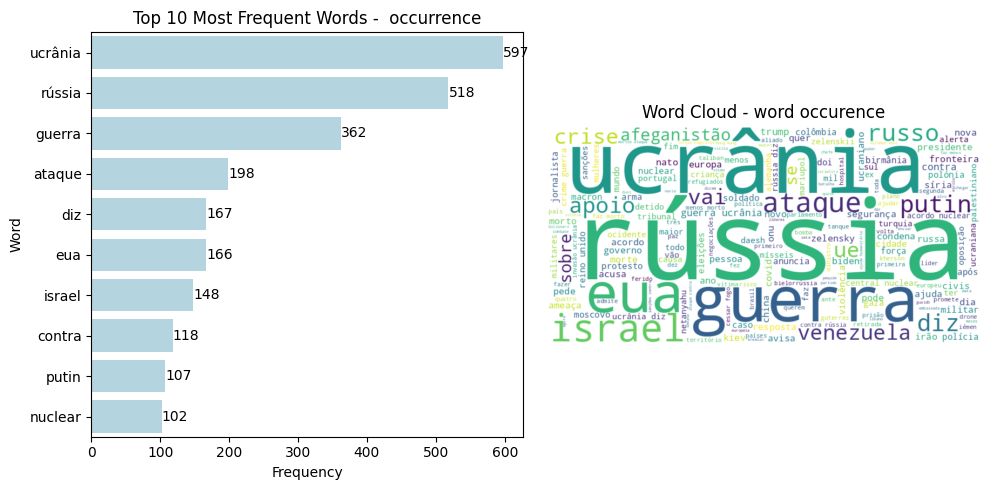

In [ ]:
# Filter occurrence and non occurrence, and create copies to avoid SettingWithCopyWarning
occur = df_copy[df_copy['total_keyword_count'] > 0].copy()

import ast

# Cleaning the string representation to ensure proper conversion
occur['headline_clean'] = occur['headline_clean'].apply(
    lambda x: ast.literal_eval(x.replace("'", "\"")) if isinstance(x, str) else x
)


# Function to calculate word frequencies
from collections import Counter

def get_top_words(data, column, top_n=10):
    all_words = [word for content in data[column] for word in content]
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Get the top 10 words for occurrence and non occurrence
top_10_occur = get_top_words(occur, 'headline_clean', top_n=10)

# Create DataFrames for easier plotting
top_10_occur_df = pd.DataFrame(top_10_occur, columns=['Word', 'Frequency'])

# Create subplots to display the charts side by side
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot occurrence word frequencies
ax_roberta = sns.barplot(x='Frequency', y='Word', data=top_10_occur_df, ax=axes[0], color='lightblue')
axes[0].set_title('Top 10 Most Frequent Words -  occurrence')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Word')

# Annotate bars with counts for Roberta
for index, row in top_10_occur_df.iterrows():
    axes[0].text(row['Frequency'] + 0.5, index, str(row['Frequency']), va='center', ha='left', fontsize=10)
# Import the necessary libraries for word cloud generation

# Function to generate a word cloud from a list of words
def generate_word_cloud(data, column):
    # Flatten the list of words in the column
    all_words = [word for content in data[column] for word in content]

    # Join the words into a single string, as required by WordCloud
    text = ' '.join(all_words)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    return wordcloud

# Generate word clouds for both occurrence and no occurrence
wordcloud_occur = generate_word_cloud(occur, 'headline_clean')



# Display word cloud for Occurrenc
axes[1].imshow(wordcloud_occur, interpolation='bilinear')
axes[1].axis('off')  # Remove axes
axes[1].set_title('Word Cloud - word occurence')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

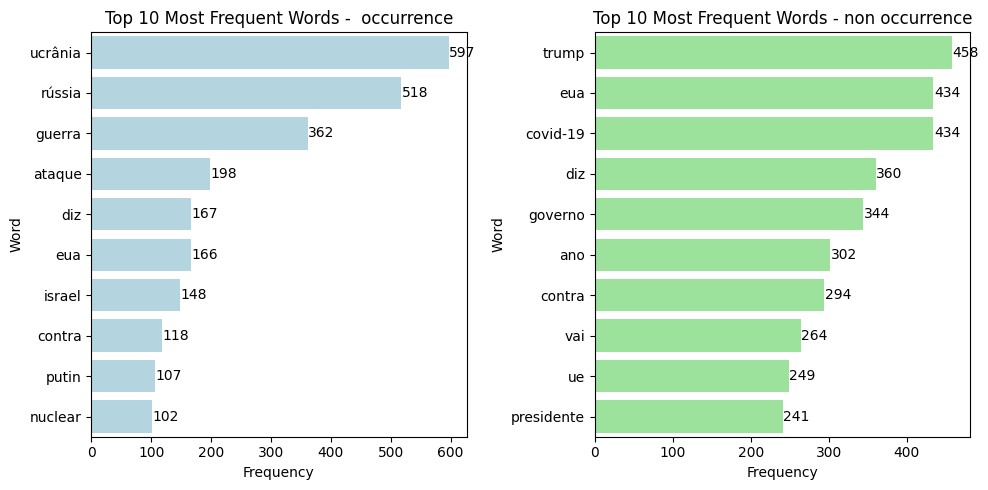

In [ ]:
'''
# Filter occurrence and non occurrence, and create copies to avoid SettingWithCopyWarning
occur = df_copy[df_copy['total_keyword_count'] > 0].copy()
no_occur = df_copy[df_copy['total_keyword_count'] ==0].copy()

import ast

# Cleaning the string representation to ensure proper conversion
occur['headline_clean'] = occur['headline_clean'].apply(
    lambda x: ast.literal_eval(x.replace("'", "\"")) if isinstance(x, str) else x
)

no_occur['headline_clean'] = no_occur['headline_clean'].apply(
    lambda x: ast.literal_eval(x.replace("'", "\"")) if isinstance(x, str) else x
)

# Function to calculate word frequencies
from collections import Counter

def get_top_words(data, column, top_n=10):
    all_words = [word for content in data[column] for word in content]
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Get the top 10 words for occurrence and non occurrence
top_10_occur = get_top_words(occur, 'headline_clean', top_n=10)
top_10_no_occur = get_top_words(no_occur, 'headline_clean', top_n=10)

# Create DataFrames for easier plotting
top_10_occur_df = pd.DataFrame(top_10_occur, columns=['Word', 'Frequency'])
top_10_no_occur_df = pd.DataFrame(top_10_no_occur, columns=['Word', 'Frequency'])

# Create subplots to display the charts side by side
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot occurrence word frequencies
ax_roberta = sns.barplot(x='Frequency', y='Word', data=top_10_occur_df, ax=axes[0], color='lightblue')
axes[0].set_title('Top 10 Most Frequent Words -  occurrence')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Word')

# Annotate bars with counts for Roberta
for index, row in top_10_occur_df.iterrows():
    axes[0].text(row['Frequency'] + 0.5, index, str(row['Frequency']), va='center', ha='left', fontsize=10)

# Plot non occurrence word frequencies
ax_vader = sns.barplot(x='Frequency', y='Word', data=top_10_no_occur_df, ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words - non occurrence')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Word')

# Annotate bars with counts for Vader
for index, row in top_10_no_occur_df.iterrows():
    axes[1].text(row['Frequency'] + 0.5, index, str(row['Frequency']), va='center', ha='left', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
'''

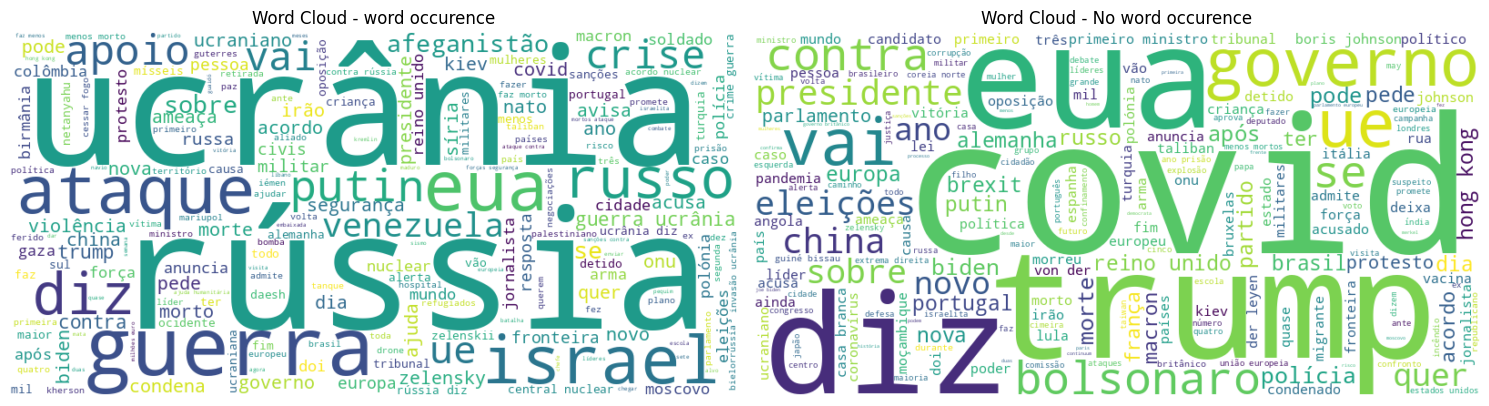

In [ ]:
'''
# Import the necessary libraries for word cloud generation
from wordcloud import WordCloud

# Function to generate a word cloud from a list of words
def generate_word_cloud(data, column):
    # Flatten the list of words in the column
    all_words = [word for content in data[column] for word in content]

    # Join the words into a single string, as required by WordCloud
    text = ' '.join(all_words)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    return wordcloud

# Generate word clouds for both occurrence and no occurrence
wordcloud_occur = generate_word_cloud(occur, 'headline_clean')
wordcloud_no_occur = generate_word_cloud(no_occur, 'headline_clean')

# Plot the word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Display word cloud for Occurrenc
axes[0].imshow(wordcloud_occur, interpolation='bilinear')
axes[0].axis('off')  # Remove axes
axes[0].set_title('Word Cloud - word occurence')

# Display word cloud for no occurrence
axes[1].imshow(wordcloud_no_occur, interpolation='bilinear')
axes[1].axis('off')  # Remove axes
axes[1].set_title('Word Cloud - No word occurence')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
'''

now lets count the frequency of top words and compare with the reporting from un peace and security section.

In [ ]:
# List of frequent words
frequent_words = [
    "conselho de segurança", "república democrática do congo",
    "dr congo", "congo", "direitos humanos", "república centro-africana",
    "ataque", "violência", "condena", "ucrânia", "crise", "guerra", "sudão do sul"
]

# Initialize a DataFrame to store results
result = pd.DataFrame(columns=["word"] + occur['year'].unique().tolist())
result["word"] = frequent_words
result.set_index("word", inplace=True)

# Count occurrences of each word in each year using the `headline` column
for word in frequent_words:
    for year in occur['year'].unique():
        count = occur.loc[occur['year'] == year, 'headline'].str.contains(word, case=False, na=False).sum()
        result.loc[word, year] = count

# Replace NaN with 0 for missing counts
result.fillna(0, inplace=True)

# Define the keywords to group
keywords = ['dr congo', 'congo', 'república democrática do congo']

# Reset the index to make 'word' a column
result = result.reset_index()

# Aggregate 'congo-related terms'
result.loc[result['word'].isin(keywords), 'word'] = 'congo-related terms'
result = result.groupby('word', as_index=False).sum()

# Display the final DataFrame
display(result)


,word,2019,2020,2021,2022,2023
0,ataque,41,14,57,96,19
1,condena,14,6,15,18,2
2,congo-related terms,7,6,7,0,0
3,conselho de segurança,0,1,3,4,0
4,crise,18,17,29,34,3
5,direitos humanos,1,1,3,2,0
6,guerra,32,20,38,217,49
7,república centro-africana,0,0,1,1,0
8,sudão do sul,0,0,0,0,1
9,ucrânia,15,5,24,454,99


**count of top to words from first stage (un global peace and security) in publico**


Analyzing the occurrence of the most frequent words from the first-stage analysis in **publico.pt**, we observe that terms like **Ukraine**, **Attack**, and **War** dominate. In contrast, words such as **Central African Republic** and **Human Rights** appear far less frequently.  

Next, we will provide a breakdown of these word frequencies by year.

In [ ]:
result['sum_of_counts'] = result[2019]+result[2020]+result[2021]+result[2022]+result[2023]

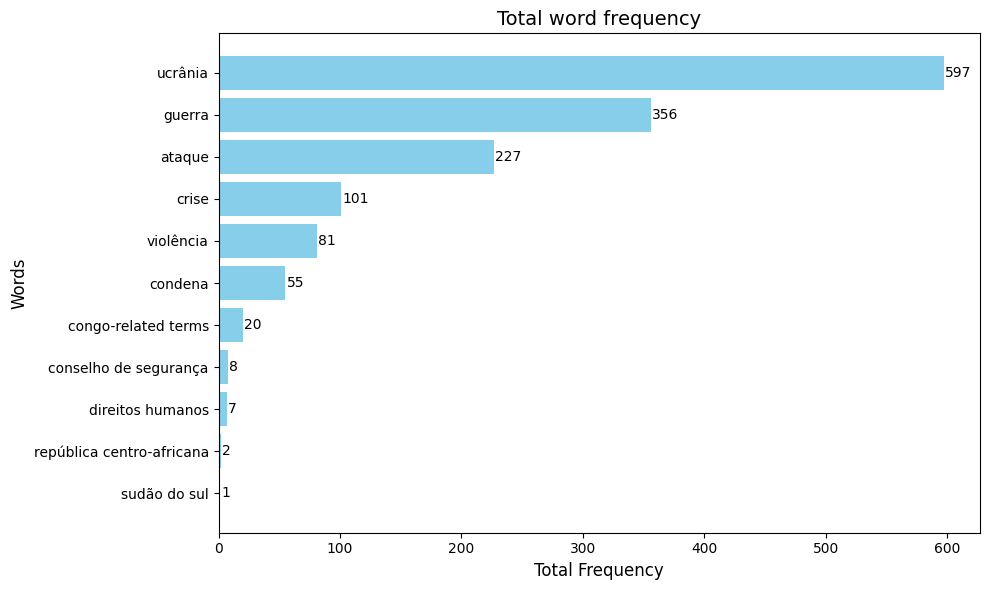

In [ ]:
import matplotlib.pyplot as plt

# Sort the dataframe by the 2019 column for better visualization
results_sorted = result.sort_values(by='sum_of_counts', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.barh(results_sorted['word'], results_sorted['sum_of_counts'], color='skyblue')

# Add the count of each word on the bars
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Position to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Vertical alignment in the middle of the bar
        str(int(bar.get_width())),  # The value of the bar (converted to an integer)
        va='center', fontsize=10
    )

# Add labels and title
plt.xlabel('Total Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Total word frequency', fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest bar at the top

# Display the plot
plt.tight_layout()
plt.show()


**frequency of words per year**

The term **Ukraine** has the highest overall count, driven by the overwhelming coverage in **2022** and **2023**. However, in earlier years (**2019 to 2021**), words like **Attack** and **War** were the most frequently occurring, reflecting their prominence during that period.  

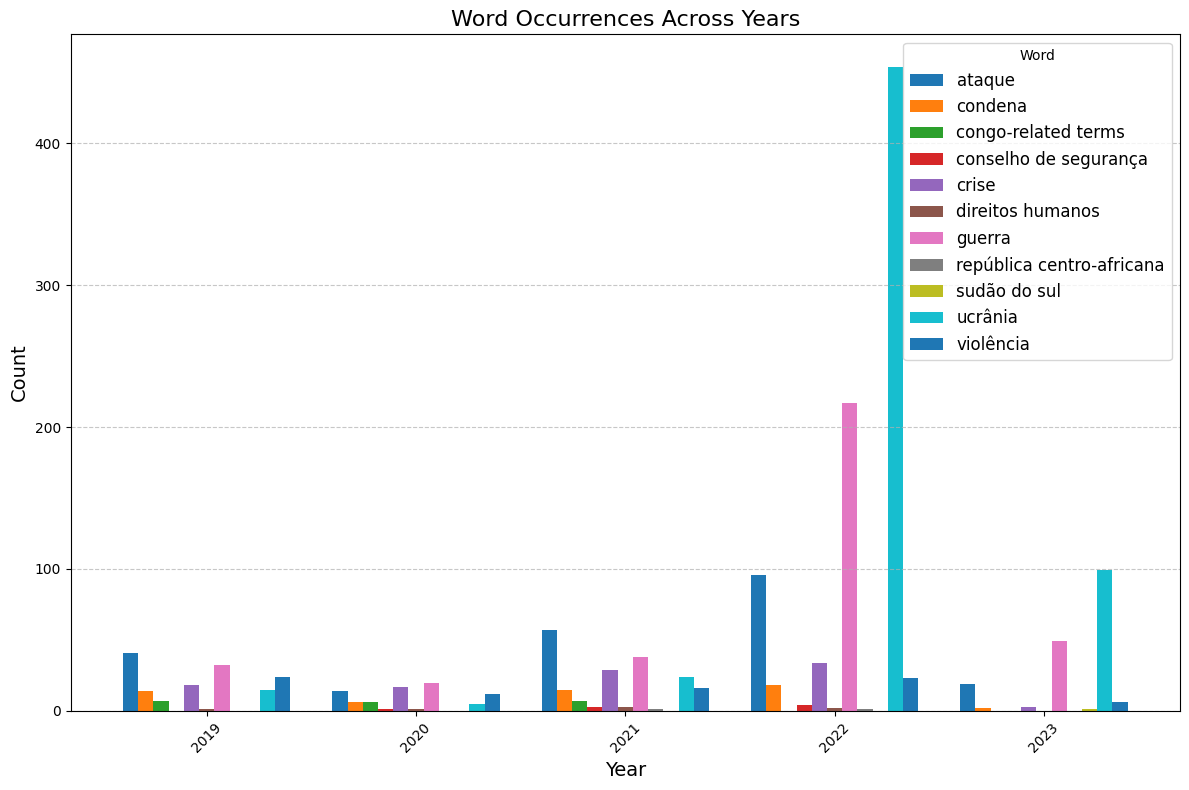

In [ ]:
import matplotlib.pyplot as plt

# Transpose the DataFrame to make years the columns and words the rows
result_plot = result[['word', 2019, 2020, 2021,2022, 2023]].set_index('word').transpose()

# Create a grouped bar plot
ax = result_plot.plot(kind='bar', figsize=(12, 8), width=0.8)

# Add labels and title
plt.title('Word Occurrences Across Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Word', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


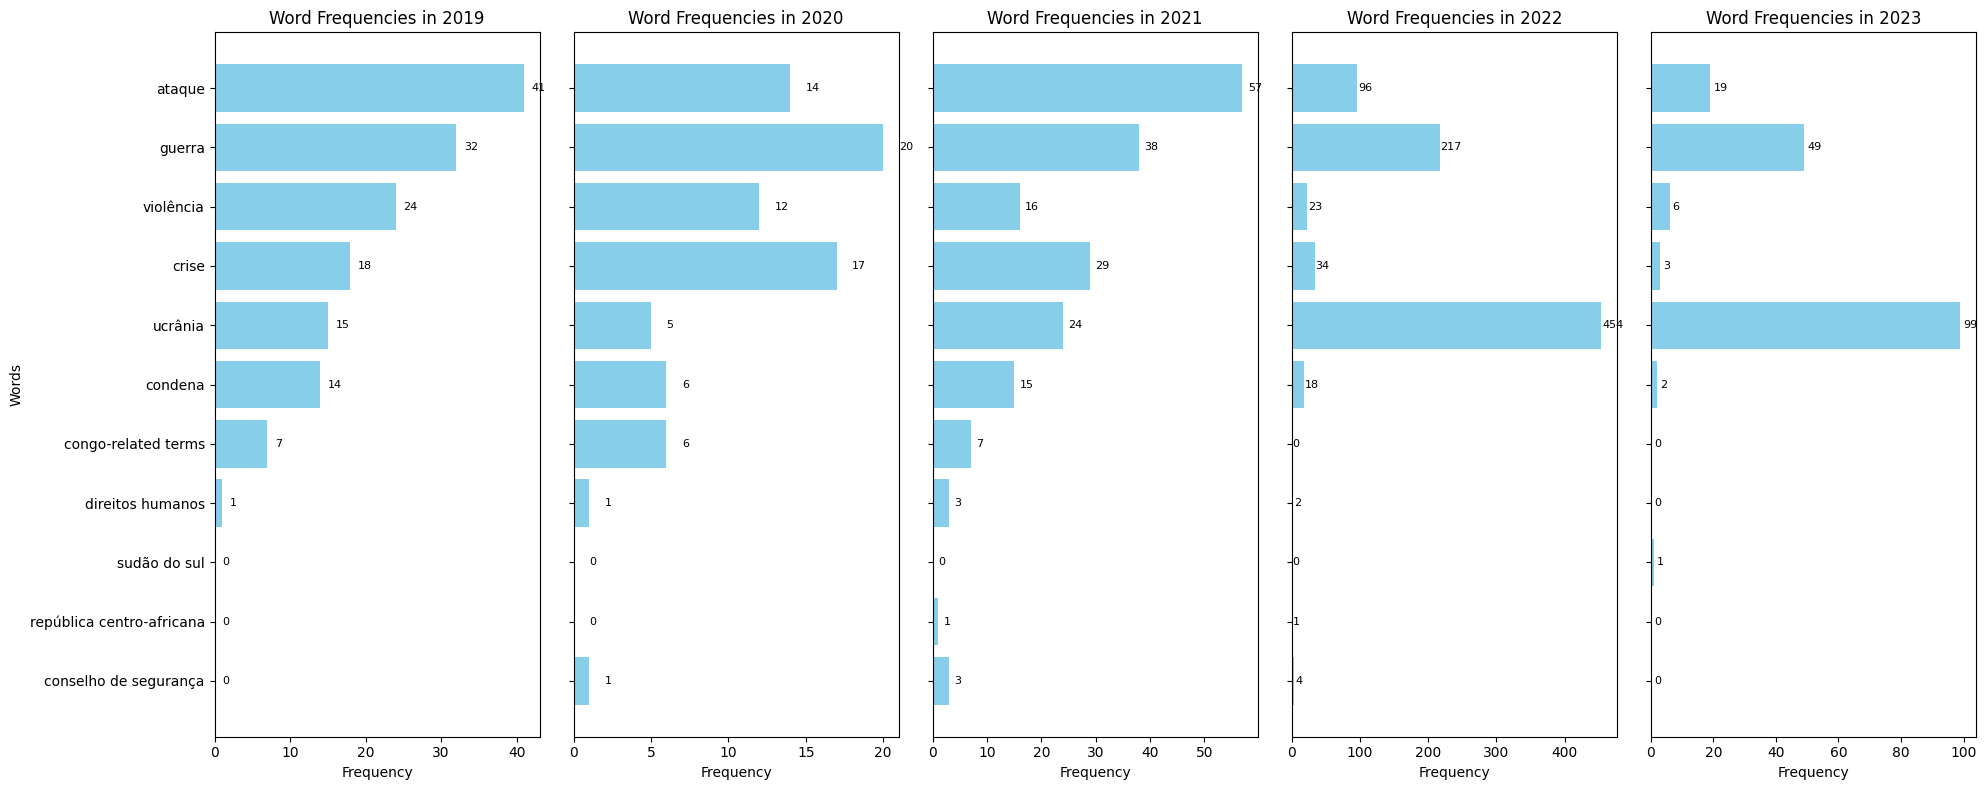

In [ ]:
import matplotlib.pyplot as plt

# Define the years to plot
years = [2019, 2020, 2021, 2022, 2023]

# Create a figure with subplots (1 row and 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 8), sharey=True)  # Share the y-axis for better comparison

# Loop through each year and create a subplot
for i, year in enumerate(years):
    # Sort by the current year for better visualization
    results_sorted = result.sort_values(by=year, ascending=True)

    # Plot horizontal bar chart
    bars = axes[i].barh(results_sorted['word'], results_sorted[year], color='skyblue')

    # Add counts to the bars
    for bar in bars:
        axes[i].text(
            bar.get_width() + 1,  # Position to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # Vertical alignment
            str(int(bar.get_width())),  # Frequency value
            va='center', fontsize=8
        )

    # Set title, labels, and formatting
    axes[i].set_title(f'Word Frequencies in {year}', fontsize=12)
    axes[i].set_xlabel('Frequency', fontsize=10)
    if i == 0:
        axes[i].set_ylabel('Words', fontsize=10)  # Add y-axis label to the first subplot

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


**word frequency assoiation and analysis**

we want to establish the correlation of the frequency of these words with the portuguese media

In [ ]:


# Create a DataFrame
data = {
    'key_term': ['South Sudan', 'Ukraine', 'Attack', 'Condemn', 'Congo', 'Security council', 'Crisis', 'Human rights', 'War', 'Central African Republic', 'Violence' ],
    'un': [37, 137, 215, 139, 73, 112, 152, 51, 142, 22, 188],
    'publico' : [1, 597, 227, 55, 20, 8, 101, 7, 356, 2, 81]
}

# Create the DataFrame
df_terms = pd.DataFrame(data)

# Display the sample DataFrame
#display(df_terms)


**Association of Word Frequency with UN Peace and Security Topics**


The word frequency in **Público** shows a moderate correlation of **0.46** with the **UN peace and security keywords**, indicating that Público's coverage only partially aligns with the UN's focus on peace and security themes.  

Next, we will identify the specific keywords with **low correlation**.

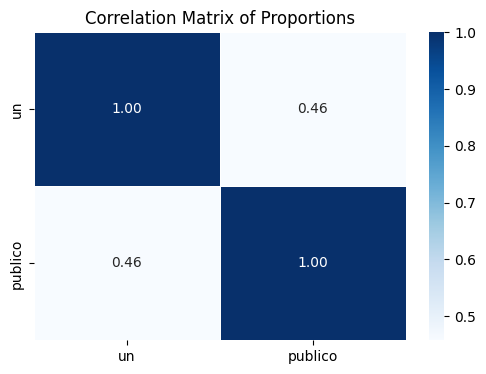

In [ ]:
# Calculate the correlation matrix for 'un', 'publico', and 'jn'
corr_matrix = df_terms[['un', 'publico']].corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Proportions')
plt.show()

**Low Correlation Words**  

The moderate correlation (**0.46**) is largely attributed to the low proportional representation of keywords such as **South Sudan**, **Central African Republic**, and similar terms. These words appear infrequently in **Público**, contributing to the weaker alignment with UN peace and security themes.  

In [ ]:
# Calculate proportions (normalized values for 'un' and 'publico')
df_terms['un_proportion'] = df_terms['un'] / df_terms['un'].sum()
df_terms['publico_proportion'] = df_terms['publico'] / df_terms['publico'].sum()



# Calculate the absolute difference between the proportions
df_terms['proportion_difference'] = abs(df_terms['un_proportion'] - df_terms['publico_proportion'])

# Identify rows with the largest differences (low correlation)
low_correlation_rows = df_terms.sort_values(by='proportion_difference', ascending=False)

# Display rows with the largest proportion differences
print("Rows with low correlation:")
display(low_correlation_rows[['key_term', 'un', 'publico', 'proportion_difference']])


Rows with low correlation:


,key_term,un,publico,proportion_difference
1,Ukraine,137,597,0.302265
8,War,142,356,0.132686
10,Violence,188,81,0.092595
5,Security council,112,8,0.082830
3,Condemn,139,55,0.071821
6,Crisis,152,101,0.050458
4,Congo,73,20,0.043825
7,Human rights,51,7,0.035410
0,South Sudan,37,1,0.028493
9,Central African Republic,22,2,0.015976


### Summary of WORD FREQUECY CORRELATION AND ANALYSIS



- Prominent keywords: **Ukraine**, **Russia**, **Attack**, **War**, and **Israel** dominate the analysis.  
- In **publico.pt**, words like **Ukraine**, **Attack**, and **War** are most frequent, while terms like **Central African Republic** and **Human Rights** are far less represented.  
- **Ukraine** has the highest overall count, driven by coverage in **2022-2023**. In contrast, **Attack** and **War** were more prominent during **2019-2021**.  
- Moderate correlation (**0.46**) exists between **Público** word frequencies and **UN peace and security keywords**, reflecting partial alignment.  
- Low proportionality of terms like **South Sudan** and **Central African Republic** contributes to the weaker correlation.  

## Projection of Conflict Analysis on the Portuguese Media


To further strengthen our exploration of global peace and security news coverage on the Portuguese media website, we aim to examine whether some of the most significant and negative news from specific regions and years are reported.  

This step will help us verify if the key headlines from the first-stage conflict analysis are also present and covered in **Público**.

**quick recap of some most conflicting headlines**


#### **Middle East**:
- **2019**: Focused on **Syria** and **Yemen**, highlighting **violence**, **attack**, and **security** due to ongoing conflicts.  
- **2023**: Shifted to the **Gaza conflict** and **Israel-Palestine**, with themes like **crisis**, **aid**, and **humanitarian concerns**.

#### **Europe**:
- **2022**: Dominated by the **Ukraine-Russia conflict**, with discussions of **war**, **nuclear**, and **attack**, emphasizing the global impact and escalation.

#### **Asia-Pacific**:
- **2022**: Coverage driven by conflicts in **Myanmar** and **Afghanistan**, focusing on **violence**, **attack**, **rights**, and **condemnations**, reflecting human rights and political unrest.

#### **Americas**:
- **2019**: Centered on **Venezuela** and **Colombia**, with key topics like **rights**, **killed**, and **crisis**, highlighting political and humanitarian crises.  
- **2022 and 2023**: Shifted to **Haiti**, emphasizing **violence**, **gangs**, **UNICEF**, and **crisis**, underscoring instability and humanitarian issues.



we will check fro the above conflicts

In [ ]:
from googletrans import Translator

conflict_2019_middle_east = occur[['headline', 'section', 'month_name', 'year']][(occur['headline'].str.contains
 ('síria | iémen', case=False, na=False)) & (occur['year'] == 2019)]

#conflict_2019_middle_east=conflict_2019_middle_east

print(conflict_2019_middle_east.shape)
conflict_2019_middle_east=conflict_2019_middle_east[:20]

# Initialize the translator
translator = Translator()

# Create a new DataFrame to hold the translated text
conflict_2019_middle_east_translated = conflict_2019_middle_east.copy()

# Translate the 'headline' and 'section' columns
conflict_2019_middle_east_translated['headline_translated'] = conflict_2019_middle_east['headline'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)
conflict_2019_middle_east_translated['section_translated'] = conflict_2019_middle_east['section'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)

# Display each translated row
for i, row in conflict_2019_middle_east_translated.iterrows():
    print("Headline (PT):", row['headline'])
    print("Headline (EN):", row['headline_translated'], "\n")
    print("Section (PT):", row['section'])
    print("Section (EN):", row['section_translated'], "\n")
    print("Month:", row['month_name'])
    print("Year:", row['year'])
    print("\n" + "-"*50 + "\n")


(11, 4)
Headline (PT): Bolton diz que saída da Síria depende de protecção dos curdos
Headline (EN): Bolton says that departure from Syria depends on the protection of the Kurds 

Section (PT): Mundo
Section (EN): World 

Month: January
Year: 2019

--------------------------------------------------

Headline (PT): Frio põe em risco sobrevivência de refugiados na Síria e no Líbano
Headline (EN): Cold endangers refugees survival in Syria and Lebanon 

Section (PT): Mundo
Section (EN): World 

Month: January
Year: 2019

--------------------------------------------------

Headline (PT): Guerra no Iémen: democratas votam contra apoio dos EUA à Arábia Saudita
Headline (EN): War in Yemen: Democrats vote against US support to Saudi Arabia 

Section (PT): Mundo
Section (EN): World 

Month: February
Year: 2019

--------------------------------------------------

Headline (PT): Doadores da Síria ultrapassaram em 40% as metas para apoio humanitário em 2018
Headline (EN): Syrian donors exceeded 40% 

In [ ]:
conflict_2023_middle_east = occur[['headline', 'section', 'month_name', 'year']][(occur['headline'].str.contains
 ('gaza|palestina', case=False, na=False)) & (occur['year'] == 2023) & (occur['section'].isin(['Mundo', 'Médio Oriente']))]

#conflict_2019_middle_east=conflict_2019_middle_east

print(conflict_2023_middle_east.shape)
conflict_2023_middle_east=conflict_2023_middle_east

# Initialize the translator
translator = Translator()

# Create a new DataFrame to hold the translated text
conflict_2023_middle_east_translated = conflict_2023_middle_east.copy()

# Translate the 'headline' and 'section' columns
conflict_2023_middle_east_translated['headline_translated'] = conflict_2023_middle_east['headline'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)
conflict_2023_middle_east_translated['section_translated'] = conflict_2023_middle_east['section'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)

# Display each translated row
for i, row in conflict_2023_middle_east_translated.iterrows():
    print("Headline (PT):", row['headline'])
    print("Headline (EN):", row['headline_translated'], "\n")
    print("Section (PT):", row['section'])
    print("Section (EN):", row['section_translated'], "\n")
    print("Month:", row['month_name'])
    print("Year:", row['year'])
    print("\n" + "-"*50 + "\n")


(3, 4)
Headline (PT): Israelitas bombardeiam Gaza um dia depois de terem matado nove palestinianos
Headline (EN): Israelites bombard Gaza a day after killing nine Palestinians 

Section (PT): Mundo
Section (EN): World 

Month: January
Year: 2023

--------------------------------------------------

Headline (PT): Desordem Mundial. Israel e Palestina: a tensão que convém a todos
Headline (EN): World disorder.Israel and Palestine: the tension that suits everyone 

Section (PT): Mundo
Section (EN): World 

Month: February
Year: 2023

--------------------------------------------------

Headline (PT): Pedro Pires traz “a tragédia” de Gaza ao seu doutoramento honoris causa em Lisboa
Headline (EN): Pedro Pires brings “The Tragedy” of Gaza to his doctorate Honoris causa in Lisbon 

Section (PT): Mundo
Section (EN): World 

Month: December
Year: 2023

--------------------------------------------------



In [ ]:
conflict_2022_europe = occur[['headline', 'section', 'month_name', 'year']][(occur['headline'].str.contains
 ('ucrânia |guerra|rússia', case=False, na=False)) & (occur['year'] == 2022) & (occur['section'].isin(['Mundo', 'Europa']))]

#conflict_2019_middle_east=conflict_2019_middle_east

print(conflict_2022_europe.shape)
conflict_2022_europe=conflict_2022_europe.sample(10)

# Initialize the translator
translator = Translator()

# Create a new DataFrame to hold the translated text
conflict_2022_europe_translated = conflict_2022_europe.copy()

# Translate the 'headline' and 'section' columns
conflict_2022_europe_translated['headline_translated'] = conflict_2022_europe['headline'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)
conflict_2022_europe_translated['section_translated'] = conflict_2022_europe['section'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)

# Display each translated row
for i, row in conflict_2022_europe_translated.iterrows():
    print("Headline (PT):", row['headline'])
    print("Headline (EN):", row['headline_translated'], "\n")
    print("Section (PT):", row['section'])
    print("Section (EN):", row['section_translated'], "\n")
    print("Month:", row['month_name'])
    print("Year:", row['year'])
    print("\n" + "-"*50 + "\n")


(646, 4)
Headline (PT): Macron arranca a campanha em subida nas sondagens com a guerra em pano de fundo
Headline (EN): Macron starts the campaign climbing on the polls with the war on the background 

Section (PT): Mundo
Section (EN): World 

Month: March
Year: 2022

--------------------------------------------------

Headline (PT): Ucrânia quer “criar caos” dentro das forças russas, diz conselheiro de Zelensky
Headline (EN): Ukraine wants to “create chaos” within Russian forces, says Zelensky's advisor 

Section (PT): Mundo
Section (EN): World 

Month: August
Year: 2022

--------------------------------------------------

Headline (PT): Contra-ofensiva da Ucrânia em Kherson “ganha força”. Rússia lança ataque na região de Kiev
Headline (EN): Ukraine's counteroffensive in Kherson "gains strength."Russia launches attack in the Kiev region 

Section (PT): Mundo
Section (EN): World 

Month: July
Year: 2022

--------------------------------------------------

Headline (PT): Falta de instrut

In [ ]:
conflict_2021_asia_pacific = occur[['headline', 'section', 'month_name', 'year']][(occur['headline'].str.contains
 ('birmânia', case=False, na=False)) & (occur['year'] == 2021) & (occur['section'].isin(['Mundo', 'Ásia']))]

#conflict_2019_middle_east=conflict_2019_middle_east

print(conflict_2021_asia_pacific.shape)
conflict_2021_asia_pacific=conflict_2021_asia_pacific.sample(10)

# Initialize the translator
translator = Translator()

# Create a new DataFrame to hold the translated text
conflict_2021_asia_pacific_translated = conflict_2021_asia_pacific.copy()

# Translate the 'headline' and 'section' columns
conflict_2021_asia_pacific_translated['headline_translated'] = conflict_2021_asia_pacific['headline'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)
conflict_2021_asia_pacific_translated['section_translated'] = conflict_2021_asia_pacific['section'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)

# Display each translated row
for i, row in conflict_2021_asia_pacific_translated.iterrows():
    print("Headline (PT):", row['headline'])
    print("Headline (EN):", row['headline_translated'], "\n")
    print("Section (PT):", row['section'])
    print("Section (EN):", row['section_translated'], "\n")
    print("Month:", row['month_name'])
    print("Year:", row['year'])
    print("\n" + "-"*50 + "\n")


(18, 4)
Headline (PT): Manifestantes desafiam lei marcial e avisos dos generais na Birmânia
Headline (EN): Protesters defy martial law and general warnings in Burma 

Section (PT): Mundo
Section (EN): World 

Month: February
Year: 2021

--------------------------------------------------

Headline (PT): Contestação ao golpe militar na Birmânia ganha força com apoio de professores e alunos
Headline (EN): Contestation to the military coup in Burma gains strength with the support of teachers and students 

Section (PT): Mundo
Section (EN): World 

Month: February
Year: 2021

--------------------------------------------------

Headline (PT): Eleições de Novembro foram “representativas da vontade do povo da Birmânia”, diz relatório
Headline (EN): November elections were “representative of the will of the people of Burma,” says report 

Section (PT): Mundo
Section (EN): World 

Month: May
Year: 2021

--------------------------------------------------

Headline (PT): Exército fartou-se da tran

In [ ]:
conflict_2019_americas = occur[['headline', 'section', 'month_name', 'year']][(occur['headline'].str.contains
 ('venezuela|colômbia', case=False, na=False)) & (occur['year'] == 2019) & (occur['section'].isin(['Mundo', 'Américas']))]

#conflict_2019_middle_east=conflict_2019_middle_east

print(conflict_2019_americas.shape)
conflict_2019_americas=conflict_2019_americas

# Initialize the translator
translator = Translator()

# Create a new DataFrame to hold the translated text
conflict_2019_americas_translated = conflict_2019_americas.copy()

# Translate the 'headline' and 'section' columns
conflict_2019_americas_translated['headline_translated'] = conflict_2019_americas['headline'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)
conflict_2019_americas_translated['section_translated'] = conflict_2019_americas['section'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)

# Display each translated row
for i, row in conflict_2019_americas_translated.iterrows():
    print("Headline (PT):", row['headline'])
    print("Headline (EN):", row['headline_translated'], "\n")
    print("Section (PT):", row['section'])
    print("Section (EN):", row['section_translated'], "\n")
    print("Month:", row['month_name'])
    print("Year:", row['year'])
    print("\n" + "-"*50 + "\n")


(40, 4)
Headline (PT): Portugueses continuam a abastecer as principais cidades da Venezuela
Headline (EN): Portuguese continue to supply the main cities of Venezuela 

Section (PT): Mundo
Section (EN): World 

Month: January
Year: 2019

--------------------------------------------------

Headline (PT): União Europeia defende novas presidenciais na Venezuela
Headline (EN): European Union defends new presidential presidential 

Section (PT): Mundo
Section (EN): World 

Month: January
Year: 2019

--------------------------------------------------

Headline (PT): ACNUR: mais de cinco mil pessoas abandonam a Venezuela diariamente
Headline (EN): UNUR: More than 5,000 people abandon Venezuela daily 

Section (PT): Mundo
Section (EN): World 

Month: January
Year: 2019

--------------------------------------------------

Headline (PT): Oposição anti-Maduro manifesta-se na Venezuela com os olhos postos na Europa
Headline (EN): Anti-Maduro opposition manifests itself in Venezuela with eyes put in

In [ ]:
conflict_2023_americas = occur[['headline', 'section', 'month_name', 'year']][(occur['headline'].str.contains
 ('haiti', case=False, na=False)) & (occur['year'].isin([2022, 2023])) & (occur['section'].isin(['Mundo', 'Américas', 'Haiti']))]

#conflict_2019_middle_east=conflict_2019_middle_east

print(conflict_2023_americas.shape)
conflict_2023_americas=conflict_2023_americas

# Initialize the translator
translator = Translator()

# Create a new DataFrame to hold the translated text
conflict_2023_americas_translated = conflict_2023_americas.copy()

# Translate the 'headline' and 'section' columns
conflict_2023_americas_translated['headline_translated'] = conflict_2023_americas['headline'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)
conflict_2023_americas_translated['section_translated'] = conflict_2023_americas['section'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)

# Display each translated row
for i, row in conflict_2023_americas_translated.iterrows():
    print("Headline (PT):", row['headline'])
    print("Headline (EN):", row['headline_translated'], "\n")
    print("Section (PT):", row['section'])
    print("Section (EN):", row['section_translated'], "\n")
    print("Month:", row['month_name'])
    print("Year:", row['year'])
    print("\n" + "-"*50 + "\n")


(1, 4)
Headline (PT): Adormecer ao som de tiros. Bairro na capital do Haiti está há duas semanas em clima de guerra
Headline (EN): Fall asleep to the sound of shots.Neighborhood in Haiti's capital has been in a climate of war for two weeks 

Section (PT): Mundo
Section (EN): World 

Month: July
Year: 2022

--------------------------------------------------



### **Summary of Projection of Conflict Analysis on the Portuguese Media**

- The analysis reveals substantial coverage of major topics from the first-stage conflict analysis across all continents, including:

  - **Syria** and **Yemen** violence and attacks in **2019**.
  - **Gaza** and the **Israel-Palestine** conflicts in **2023**.
  - Reports on the **Myanmar (Burma)** crisis in **2022**.
  - Coverage of the **Venezuela** and **Colombia** crisis in **2019**.

- However, there is limited reporting on **Haiti** in **2022** and **2023**.

## Conclusion and Discussion

Based on the analysis so far, we can conclude the following:

1. **Data Acquisition**:

 The **CDX API** serves as an excellent alternative to the text search API, offering the capability to access historical URLs and extract key metadata for each article.This functionality was crucial for ensuring **contextualization** in our analysis, as it allows us to retrieve and analyze articles within their original temporal and thematic frameworks, thereby enhancing the depth and relevance of our insights.  


2. **Shift in Focus Over Time**:  
   The frequency analysis suggests a shift in media focus, with terms like **Ukraine**, **Russia**, **Attack**, and **War** becoming more prominent, especially in the years following 2021. This trend reflects the growing prominence of certain geopolitical events and regional conflicts over time, possibly influenced by international attention or global media trends.
   
3. **Moderate Alignment with UN Peace and Security**:  
   While there is a moderate correlation (**0.46**) between the word frequencies in **Público** and the **UN Peace and Security** topics, the representation of certain keywords, such as those related to smaller or less-covered crises (e.g., **South Sudan**, **Central African Republic**), is low, suggesting that the media's focus may not always align with UN priorities.

4. **Coverage of Key Global Conflicts**:  
   The Portuguese media, as represented by **Público**, provides significant coverage on major global conflicts, particularly those related to violence and security issues. Key events such as the **Syria** and **Yemen** violence in 2019, the **Israel-Palestine** conflict in 2023, and the **Myanmar** crisis in 2022 received notable attention. These align with global peace and security concerns, reflecting the media's focus on critical issues.

5. **Discrepancies in Reporting**:  
   While most major conflicts have been reported, there is a notable gap in coverage regarding **Haiti** in recent years (**2022-2023**)

6. **Room for Further Exploration**:  
   The results indicate potential areas for further investigation, especially regarding the gaps in reporting and the correlation between specific regional coverage and global peace and security issues.


